# 1.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Folder path
path = r'/Users/happygirl/Data Analytics - Immersion/achievement 4 - python/Instacart Basket Analysis - Cristiane Silva'

In [4]:
# Importing 'orders_products_merged.pkl' via pandas.pkl and os.path.join
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

# 2.

In [5]:
df_ords_prods_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  average_price           float64 
 21  spendi

In [6]:
#checking imported file 
df_ords_prods_all.shape

(32404859, 31)

### Barcharts

<Axes: >

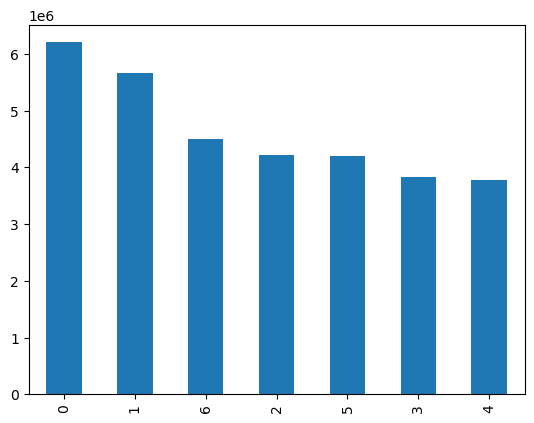

In [7]:
# creating  bar charts
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

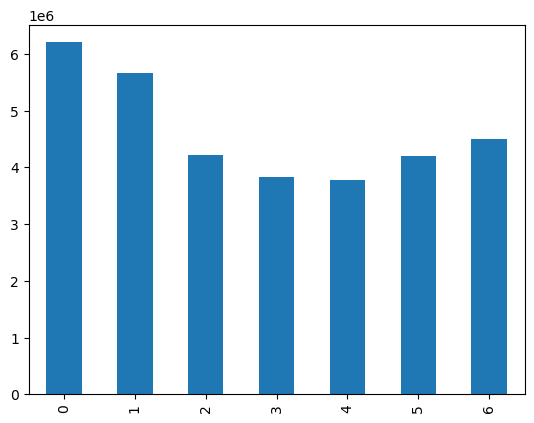

In [8]:
# Sorting
bar_ords_week = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

### Histogram

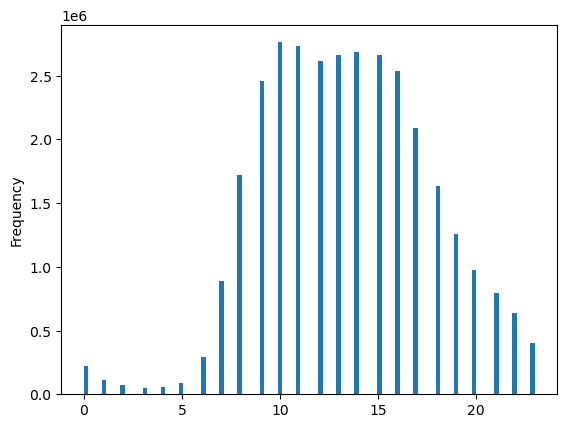

In [15]:
# histogram of the 'order_hour_of_day' column

hist = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 100)

Most orders are made between 9 am and 5 pm.

In [16]:
# since there are rows with inaccurately high prices, and it is skewing our analysis, we will manually mark them as missing

df_ords_prods_all.loc[df_ords_prods_all['prices']>100, 'prices'] = np.nan

In [18]:
# check update

df_ords_prods_all['prices'].max()

25.0

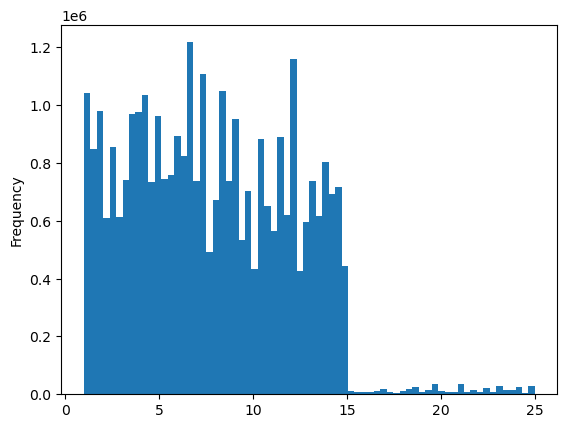

In [20]:
# store the histogram for prices in the variable 'hist'

hist = df_ords_prods_all['prices'].plot.hist(bins = 70)

### Scatterplot

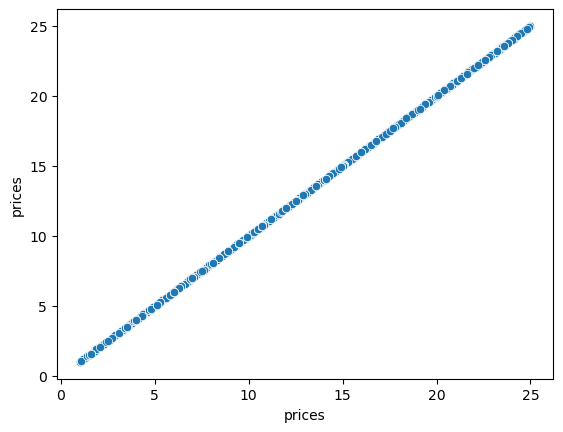

In [21]:
scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)

### Sampling data

In [22]:
# Create a list holding true/false values to test np.random.rand()<= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7
dev

array([False,  True, False, ...,  True,  True,  True])

In [23]:
# Store 70 % of the sample in dataframe big
big = df_ords_prods_all[dev]

In [24]:
# Store 30 % of the sample in dataframe small
small = df_ords_prods_all[~dev]

In [25]:
# Checking partition
len(df_ords_prods_all)

32404859

In [26]:
# Checking partition
len(big) + len(small)

32404859

In [27]:
# creating a subset data frame for our line chart
df_small = small[['orders_day_of_week','prices']]

### Line chart

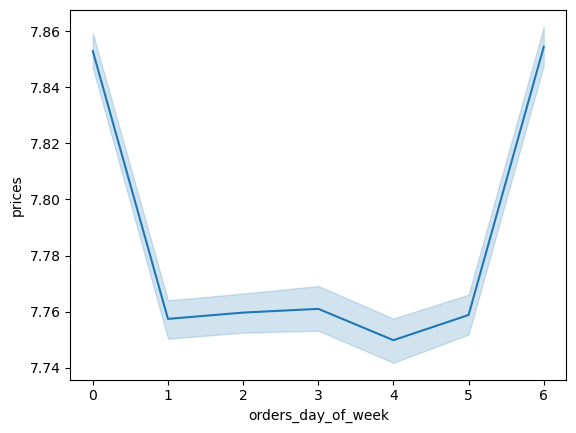

In [28]:
# creating a line chart
line_chart_week_prices = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

# 3.

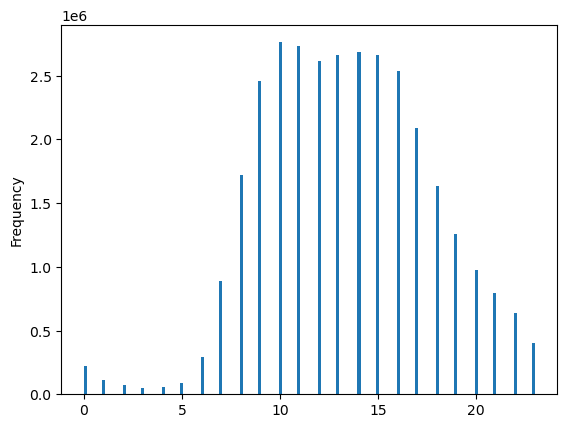

In [29]:
hist_order_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 150)

#### The histogram is showing the frequency values of orders per hour in the whole dataset. Most orders are made between 9 am and 5 pm.

# 4.

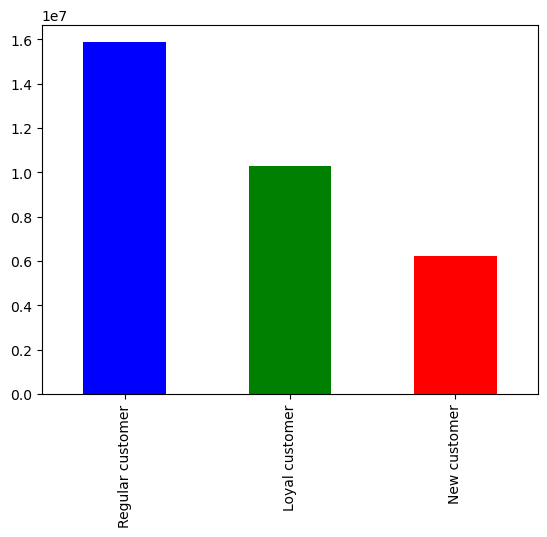

In [30]:
#creating a bar chart
barchart_loyalty_customers = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar(color = ['blue', 'green', 'red'])

#### The most number of orders come from regular customers, followed by loyal customers.

# 5.

In [31]:
# creating a line chart. For this first we need a subset df
df_order_hour_of_day_prices = small[['order_hour_of_day','prices']]

In [32]:
df_order_hour_of_day_prices.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


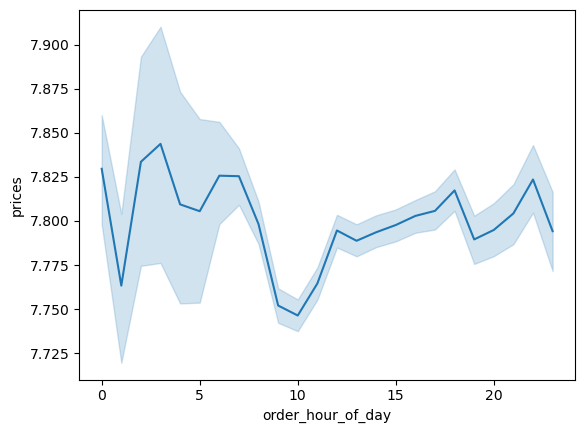

In [33]:
# creating a line chart of hour and prices
line_chart_order_hour_of_day_prices = sns.lineplot(data = df_order_hour_of_day_prices, x = 'order_hour_of_day',y = 'prices')

# 6.

In [34]:
#creating subset for the line chart 
df_age_dependants = small[['age','number_dependants']]

In [35]:
df_age_dependants.head()

,age,number_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


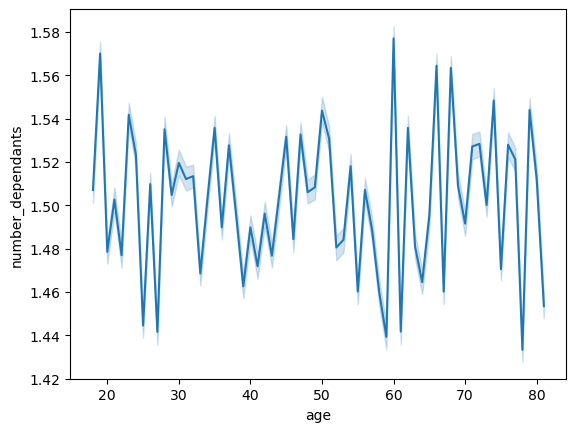

In [36]:
#creating line chart 
line_chart_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age',y = 'number_dependants')

#### The number of dependants is similar across all age categories.

# 7.

In [37]:
# defining df subset for scatterplot
df_age_income = small[['age','income']]

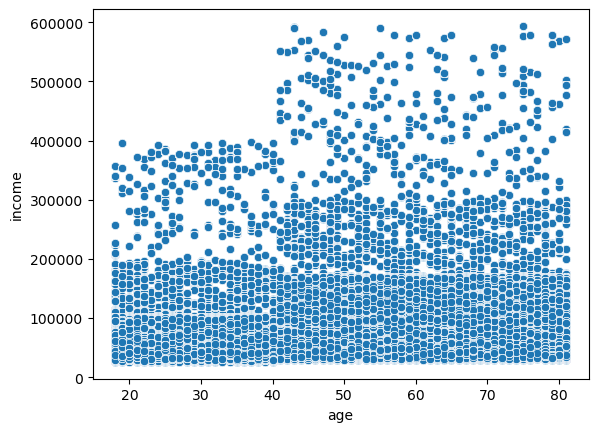

In [38]:
# creating scatterplot
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

#### The scatter plot represents the age as the independable variable and income as the dependable variable. Lower income is higher for people below 40 years old. After 40, the income increases.

# 8.

In [39]:
# Exporting .png
bar_ords_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_ords_week.png'))

In [41]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [42]:
scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_prices.png'))

In [43]:
line_chart_week_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_week_prices.png'))

In [44]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

In [45]:
barchart_loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'barchart_loyalty_customers.png'))

In [46]:
line_chart_order_hour_of_day_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_order_hour_of_day_prices.png'))

In [47]:
line_chart_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_chart_age_dependants.png'))

In [48]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))